1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

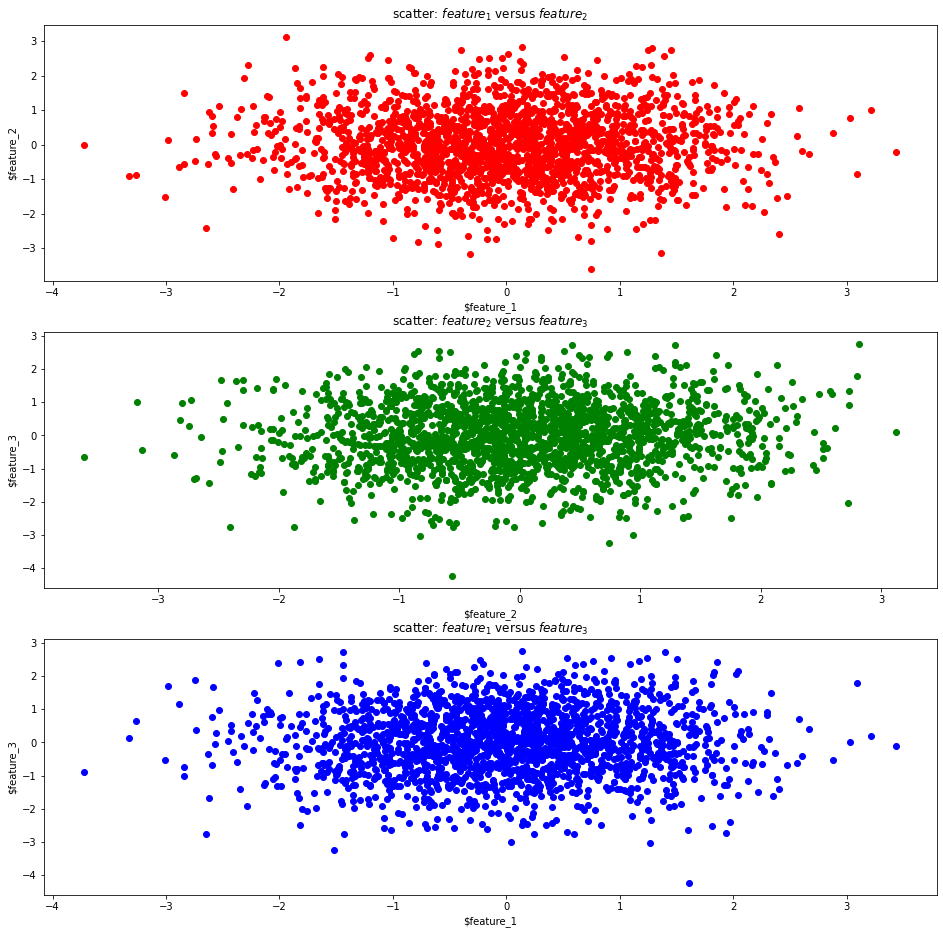

-0.005219711383220027 0.04735993943504082 0.02369042507320443 there are no corelations between any features


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# !wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/
csv_file = "data/regression_generated.csv"
data = pd.read_csv(csv_file)

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols=1, figsize =(16,16))

ax1.scatter(x=data.features_1,y=data.features_2, marker='o', c='r', edgecolor='r')
ax1.set_title('scatter: $feature_1$ versus $feature_2$')
ax1.set_xlabel('$feature_1')
ax1.set_ylabel('$feature_2')

ax2.scatter(x=data.features_2,y=data.features_3, marker='o', c='g', edgecolor='g')
ax2.set_title('scatter: $feature_2$ versus $feature_3$')
ax2.set_xlabel('$feature_2')
ax2.set_ylabel('$feature_3')

ax3.scatter(x=data.features_1,y=data.features_3, marker='o', c='b', edgecolor='b')
ax3.set_title('scatter: $feature_1$ versus $feature_3$')
ax3.set_xlabel('$feature_1')
ax3.set_ylabel('$feature_3')

plt.show()

c1 = np.corrcoef(data.features_1,data.features_2)[0,1]
c2 = np.corrcoef(data.features_2,data.features_3)[0,1]
c3 = np.corrcoef(data.features_1,data.features_3)[0,1]

print (c1,c2,c3, "there are no corelations between any features")
#corolation bak

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

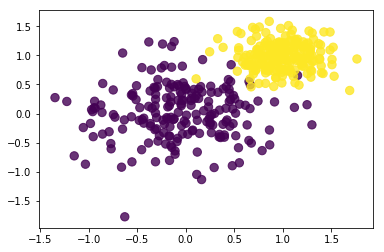

In [51]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

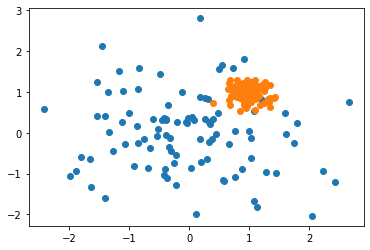

In [68]:
def gaussian():
    x = np.random.normal(loc=0., scale=1., size=(100,))
    y = np.random.normal(loc=0., scale=1., size=(100,))

    xx = np.random.normal(loc=1., scale=0.2, size=(100,))
    yy = np.random.normal(loc=1., scale=0.2, size=(100,))

    data_set1 = np.array([x,y])
    data_set2 = np.array([xx,yy])
    data_set = np.array([data_set1,data_set2])
    return data_set
data_set = gaussian()

plot =plt.scatter(data_set[0][0],data_set[0][1])
plot =plt.scatter(data_set[1][0],data_set[1][1])

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

642
-0.041647413481706204


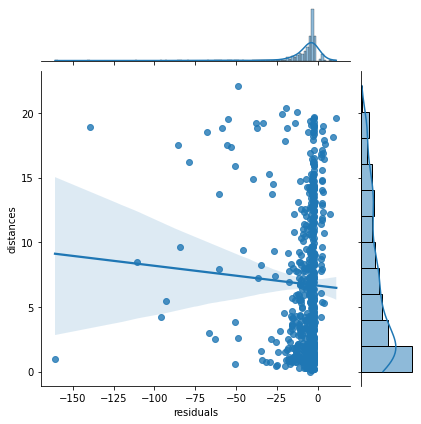

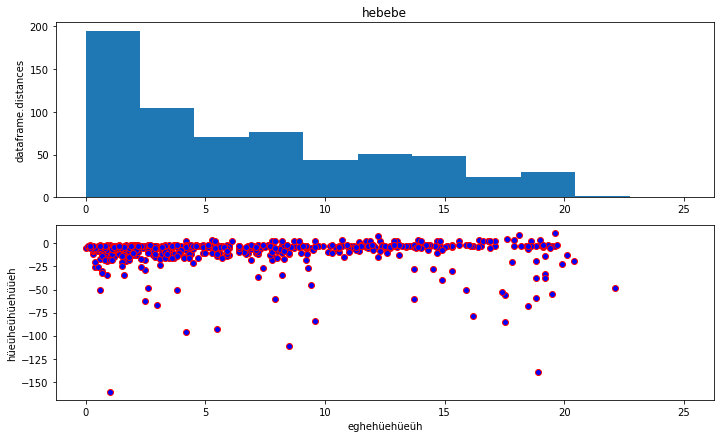

x =  [ 1.13636364  3.40909091  5.68181818  7.95454545 10.22727273 12.5
 14.77272727 17.04545455 19.31818182 21.59090909 23.86363636]
y =  [-7.502068965517244, -8.132684729064067, -9.093352216748752, -9.252980295566502, -9.2698932676519, -13.94246551724142, -7.494827586206915, -5.0588669950739, -4.5167980295566466, -13.984807881773431]
y_err =  [11.464200381235733, 9.523363745915807, 15.482835341295461, 14.890749273030009, 13.59526143525033, 24.27939751348247, 11.09251782618077, 4.793807541541095, 4.355337760854364, 27.225915190802347]


In [159]:
# !wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
import pickle
import seaborn as sns
pickle_file = "data/residuals_261.pkl"
data = open(pickle_file,'rb')
new_dict = pickle.load(data)
data.close()

list_dict = new_dict.tolist()
# print(a['residuals'], a['distances'])

dataframe = pd.DataFrame(list_dict, columns = ['residuals','distances'])#turned to DataFrame
dataframe = dataframe[abs(dataframe['residuals'])>=2]
print(len(dataframe))

# print(len(dataframe))#residuals smaller than2
sns.jointplot(x="residuals", y = "distances",data=dataframe,kind="reg")#seaborn part completed

c1 = np.corrcoef(dataframe.residuals,dataframe.distances)[0,1]
print(c1)

fig,(ax,ax1) = plt.subplots(nrows = 2, ncols=1,figsize = (10,6))
# histogram,bins,_ = plt.hist(dataframe.distances,bins=50,range = (0,25))


ax.hist(dataframe.distances, bins=11, range = (0,25))
h, bins, _ = plt.hist(dataframe.distances, bins=11, range=(0, 25), density=True, cumulative=False)
ax.set_title('hebebe')
# ax.set_xlabel('dataframe.residuals')
ax.set_ylabel('dataframe.distances')
fig.tight_layout()

ax1.scatter(x=dataframe.distances, y= dataframe.residuals, marker='o', c='b',edgecolor='r')
# ax1.set_title('gebebebeb')
ax1.set_xlabel('eghehüehüeüh')
ax1.set_ylabel('hüeüheühüehüüeh')
plt.show()

# print(bins[1])
x = (bins[:-1] + bins[1:]) / 2


y=[]

binn = int(642/11)
print("x = ", x)
for i in range(1,11):
    y.append((dataframe.residuals[binn*(i-1):binn*i]).mean())
# print(y)
print("y = ", y)
y_err = []
for i in range(1,11):
    y_err.append((dataframe.residuals[binn*(i-1):binn*i]).std())
# print(y)
print("y_err = ",y_err)



# df["Avg"] = df.groupby("cat")["B"].transform("mean") 
# # you can directly groupby pd.cut without making new column
# print(df)

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


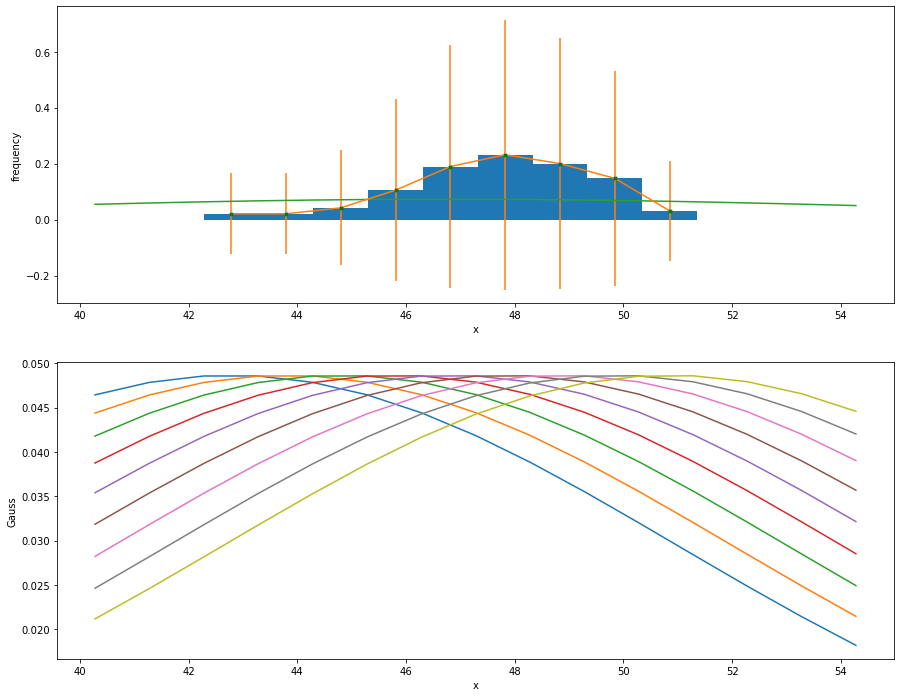

In [241]:
from scipy.stats import norm
from scipy import integrate

x = np.random.normal(loc=48,size=100,scale=2)
fig,(ax,ax1) = plt.subplots(nrows = 2, ncols=1,figsize = (15,12))
bins_max = x.max()
bins_min = x.min()
bins =  np.arange(bins_min,bins_max,(bins_max-bins_min)/10)


h, bins, _ = ax.hist(x, bins=bins, density=True, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('frequency')

x = (bins[:-1] + bins[1:]) / 2
ax.errorbar(x, h,np.sqrt(h), marker='x', mfc='red',mec='green', ms=3, mew=2)


stdef = 1.06* 12 * (x.size**-0.2)

gauss = []
for i,means in enumerate(x):
    gauss.append(norm(loc=means,scale=stdef).pdf(np.arange(bins_min-2,bins_max+2)))
    ax1.plot(np.arange(bins_min-2,bins_max+2),gauss[i])
ax1.set_xlabel('x')
ax1.set_ylabel('Gauss')

intgrate = np.array(gauss).sum(axis=0)
integral_calculate = integrate.trapz(h,dx=bins[2]-bins[1])
ax.plot(np.arange(bins_min-2,bins_max+2),intgrate/sum(intgrate)*integral_calculate)

plt.show()
# print(yerr)